In [ ]:
import pandas as pd

# Load the dataset
file_path = '../data/reviews/wine_reviews.csv' 
wine_data = pd.read_csv(file_path)


print(wine_data.head())


                                              review
0  Easily the best Sauvignon Blanc I've had to da...
1                    Excellent, Mockingbird Inn?\r\n
2  Absolutely incredible. One of the best sauvign...
3                   Reported in nytimes. Did not try
4  Great. Much different than other Sauv Blancs s...


In [ ]:
# Count missing values in review column
missing_values = wine_data['review'].isnull().sum()


print(missing_values)

0


In [2]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: transformers in c:\users\achin\anaconda3\lib\site-packages (4.46.3)



In [3]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from transformers import pipeline


classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", framework="pt")
  

In [3]:
labels = [
    "talks about food combinations",
    "talks about taste",
    "talks about value for money",
    "other"
]


In [ ]:

def classify_review(review):
    result = classifier(review, labels)
    return result["labels"][0]  

# Apply the classifier to each review
wine_data["talks_about"] = wine_data["review"].apply(classify_review)


print(wine_data.head())


                                              review        talks_about
0  Easily the best Sauvignon Blanc I've had to da...  talks about taste
1                    Excellent, Mockingbird Inn?\r\n  talks about taste
2  Absolutely incredible. One of the best sauvign...  talks about taste
3                   Reported in nytimes. Did not try              other
4  Great. Much different than other Sauv Blancs s...              other


In [8]:
output_path = '../data/reviews/wine_reviews_with_labels.csv'
wine_data.to_csv(output_path, index=False)
print(f"Updated dataset saved to {output_path}")


Updated dataset saved to ../data/reviews/wine_reviews_with_labels.csv


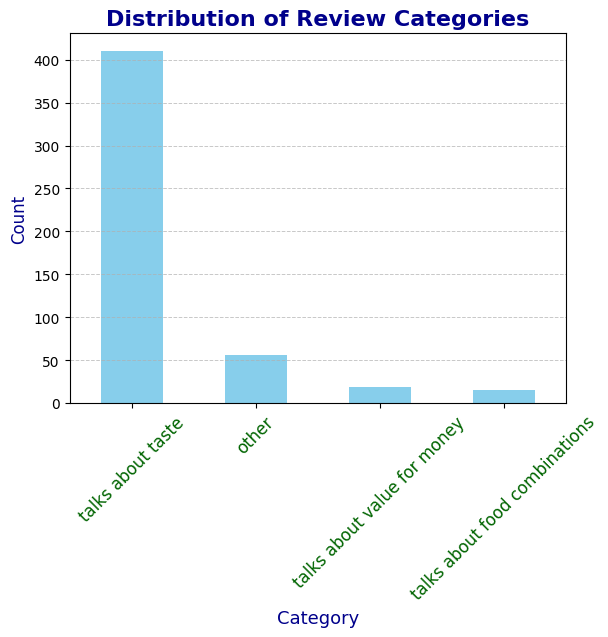

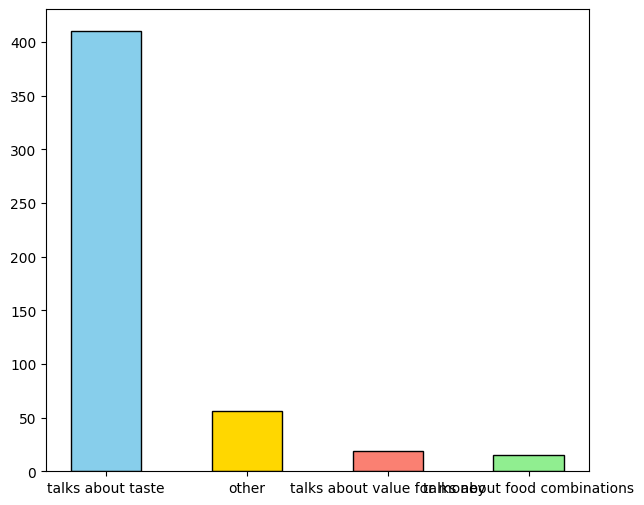

In [ ]:





import matplotlib.pyplot as plt


category_counts = wine_data["talks_about"].value_counts()

# Define a mapping of categories to colors
category_colors = {
    "talks about taste": "skyblue",
    "talks about food combinations": "lightgreen",
    "talks about value for money": "salmon",
    "other": "gold",
}


bar_colors = [category_colors.get(category, "gray") for category in category_counts.index]


category_counts.plot(kind='bar', color=bar_colors)


plt.title("Distribution of Review Categories", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Category", fontsize=13, color='darkblue')
plt.ylabel("Count", fontsize=12, color='darkblue')
plt.xticks(rotation=45, fontsize=12, color='darkgreen')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Show the plot
plt.show()





